In [235]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

import torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Prepare Training data

In [236]:
import torchvision
import torchvision.transforms as transforms


# Hyper-parameters
batch_size = 100

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [237]:
import torch
import torch.nn as nn
import torchvision


# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
        )

    def forward(self, x):
        return self.stack(x)


model = NeuralNet(input_size, hidden_size, num_classes).to(device)


In [ ]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training

In [ ]:
num_epochs = 20
learning_rate = 0.001

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')



Epoch [1/20], Step [100/600], Loss: 0.0064
Epoch [1/20], Step [200/600], Loss: 0.0027
Epoch [1/20], Step [300/600], Loss: 0.0011
Epoch [1/20], Step [400/600], Loss: 0.0174
Epoch [1/20], Step [500/600], Loss: 0.0186
Epoch [1/20], Step [600/600], Loss: 0.0073
Epoch [2/20], Step [100/600], Loss: 0.0008
Epoch [2/20], Step [200/600], Loss: 0.0053
Epoch [2/20], Step [300/600], Loss: 0.0084
Epoch [2/20], Step [400/600], Loss: 0.0114
Epoch [2/20], Step [500/600], Loss: 0.0029
Epoch [2/20], Step [600/600], Loss: 0.0044
Epoch [3/20], Step [100/600], Loss: 0.0045
Epoch [3/20], Step [200/600], Loss: 0.0057
Epoch [3/20], Step [300/600], Loss: 0.0005
Epoch [3/20], Step [400/600], Loss: 0.0022
Epoch [3/20], Step [500/600], Loss: 0.0027
Epoch [3/20], Step [600/600], Loss: 0.0187
Epoch [4/20], Step [100/600], Loss: 0.0054
Epoch [4/20], Step [200/600], Loss: 0.0003
Epoch [4/20], Step [300/600], Loss: 0.0019
Epoch [4/20], Step [400/600], Loss: 0.0018
Epoch [4/20], Step [500/600], Loss: 0.0019
Epoch [4/20

## Evaluate

In [239]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.pt')

Accuracy of the network on the 10000 test images: 97.89 %


## Load Model and Prediction

In [240]:
model1 = NeuralNet(input_size, hidden_size, num_classes).to(device)
model1.load_state_dict(torch.load('model.pt'))

<ipython-input-240-64fd1bacb7f1>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load('model.pt'))


<All keys matched successfully>

In [247]:
batch1 = iter(test_loader)
type(batch1)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [248]:
imgs, labels = next(batch1)

In [ ]:
for k in range(batch_size):
  img = imgs[k].reshape(-1, 28*28).to(device)
  label = labels[k].to(device)
  output = model1(img)
  pred = output.argmax(dim=1).item()
  actual = label.item()
  if pred != actual:
    print(f"*{k}* prediction: ", pred, " actual: ", actual)
  else:
    print(f"*{k}p* rediction/label: ", pred)

In [259]:
import matplotlib.pyplot as plt

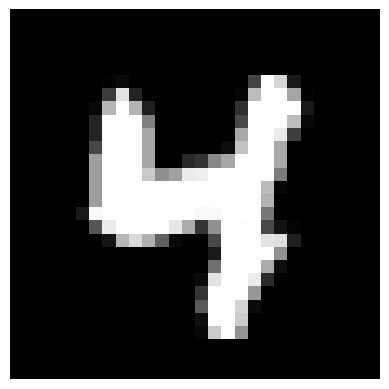

In [271]:
img = imgs[85].reshape(-1, 28*28)
img = img.reshape(28, 28)
plt.axis('off')
plt.imshow(img, cmap='gray')


64

In [273]:
len(test_dataset)

10000